In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from src.manage_precipitation_data import create_tp_daily_summary, create_tp_monthly_aggregate

# Process Precipitation Data

- open `csv` files
- process data

## Precipitation Long Format

The `long_format.csv` files contain data for each point of the grid (latitude, longitue). When downloading the data, we consider a rectangular box (N,S,W,E) and collect data that are outside Puglia region. Let's see if I can discharge coordinates that do not belong to the region we want to consider.

In [4]:
data_puglia_2020_lf = pd.read_csv('./data/2020_puglia_era5_precipitation_long_format.csv',comment = '#')
data_puglia_2020_lf.shape

(2687904, 8)

In [ ]:
# collecting all possible combination of lat, long in the dataset

lats = data_puglia_2020_lf['latitude'].unique()
lons = data_puglia_2020_lf['longitude'].unique()
# latit = []
# longit = []
lat_long = []

for lat in lats:
    for lon in lons:
        df = data_puglia_2020_lf[(data_puglia_2020_lf['latitude'] == lat) &
                                 (data_puglia_2020_lf['longitude'] == lon)]
        if df.shape[0] != 0:
            # print(f"lat = {lat}, lon = {lon}, df_shape = {df.shape}")
            # latit.append(lat)
            # longit.append(lon)
            lat_long.append((lat,lon))

In [6]:
len(lat_long)

306

We have 306 coordinates. First, we can also check if we have all expected data. For each point in the grid, we have 24 measurements a day.

In [8]:
print(f"number of expected data = {306*24*366}")
print(f"number of rows in the dataframe = {data_puglia_2020_lf.shape[0]}")

number of expected data = 2687904
number of rows in the dataframe = 2687904


In [10]:
lat_long[:4]

[(41.9, 15.4), (41.9, 15.5), (41.9, 15.8), (41.9, 15.9)]

## Precipitation Time series

Analyzing time_series files. It should contain the mean of all long/lat data for inputted values. `tp` should be cumulative value.

> To Do: Considering for London data the long/lat closer to Hampstead

1. Create column for rainfall in mm
2. Threshold the rainfall: values under 0.09 are set to 0.0 and then we round to one decimal digit.
2. Create columns for date/hour
3. Group by date and take max - checking it's the same as 23 hour, latest hour.

In [4]:
data_london_2020 = pd.read_csv('./data/2020_london_era5_precipitation_time_series.csv',comment = '#')
data_puglia_2020 = pd.read_csv('./data/2020_puglia_era5_precipitation_time_series.csv',comment = '#')
data_london_2021 = pd.read_csv('./data/2021_london_era5_precipitation_time_series.csv',comment = '#')
data_puglia_2021 = pd.read_csv('./data/2021_puglia_era5_precipitation_time_series.csv',comment = '#')
data_london_2022 = pd.read_csv('./data/2022_london_era5_precipitation_time_series.csv',comment = '#')
data_puglia_2022 = pd.read_csv('./data/2022_puglia_era5_precipitation_time_series.csv',comment = '#')
data_london_2023 = pd.read_csv('./data/2023_london_era5_precipitation_time_series.csv',comment = '#')
data_puglia_2023 = pd.read_csv('./data/2023_puglia_era5_precipitation_time_series.csv',comment = '#')
data_london_2024 = pd.read_csv('./data/2024_london_era5_precipitation_time_series.csv',comment = '#')
data_puglia_2024 = pd.read_csv('./data/2024_puglia_era5_precipitation_time_series.csv',comment = '#')

In [5]:
df_london_2020 = create_tp_daily_summary(data_london_2020, year=2020)
df_puglia_2020 = create_tp_daily_summary(data_puglia_2020, year=2020)
df_london_2021 = create_tp_daily_summary(data_london_2021, year=2021)
df_puglia_2021 = create_tp_daily_summary(data_puglia_2021, year=2021)
df_london_2022 = create_tp_daily_summary(data_london_2022, year=2022)
df_puglia_2022 = create_tp_daily_summary(data_puglia_2022, year=2022)
df_london_2023 = create_tp_daily_summary(data_london_2023, year=2023)
df_puglia_2023 = create_tp_daily_summary(data_puglia_2023, year=2023)
df_london_2024 = create_tp_daily_summary(data_london_2024, year=2024)
df_puglia_2024 = create_tp_daily_summary(data_puglia_2024, year=2024)

In [24]:
london_monthly_2020 = create_tp_monthly_aggregate(df_london_2020)
puglia_monthly_2020 = create_tp_monthly_aggregate(df_puglia_2020)
london_monthly_2021 = create_tp_monthly_aggregate(df_london_2021)
puglia_monthly_2021 = create_tp_monthly_aggregate(df_puglia_2021)
london_monthly_2022 = create_tp_monthly_aggregate(df_london_2022)
puglia_monthly_2022 = create_tp_monthly_aggregate(df_puglia_2022)
london_monthly_2023 = create_tp_monthly_aggregate(df_london_2023)
puglia_monthly_2023 = create_tp_monthly_aggregate(df_puglia_2023)
london_monthly_2024 = create_tp_monthly_aggregate(df_london_2024)
puglia_monthly_2024 = create_tp_monthly_aggregate(df_puglia_2024)

In [30]:
london_monthly_2024.columns

Index(['month_int', 'month_str', 'monthly_tp_mm'], dtype='object')

In [35]:
print(f"london 2020 yearly tp = {london_monthly_2020['monthly_tp_mm'].sum()}")
print(f"puglia 2020 yearly tp = {puglia_monthly_2020['monthly_tp_mm'].sum()} \n")
print(f"london 2021 yearly tp = {london_monthly_2021['monthly_tp_mm'].sum()}")
print(f"puglia 2021 yearly tp = {puglia_monthly_2021['monthly_tp_mm'].sum()} \n")
print(f"london 2022 yearly tp = {london_monthly_2022['monthly_tp_mm'].sum()}")
print(f"puglia 2022 yearly tp = {puglia_monthly_2022['monthly_tp_mm'].sum()} \n")
print(f"london 2023 yearly tp = {london_monthly_2023['monthly_tp_mm'].sum()}")
print(f"puglia 2023 yearly tp = {puglia_monthly_2023['monthly_tp_mm'].sum()} \n")
print(f"london 2024 yearly tp = {london_monthly_2024['monthly_tp_mm'].sum()}")
print(f"puglia 2024 yearly tp = {puglia_monthly_2024['monthly_tp_mm'].sum()} \n")

london 2020 yearly tp = 716.8
puglia 2020 yearly tp = 619.6 

london 2021 yearly tp = 854.9999999999999
puglia 2021 yearly tp = 650.5 

london 2022 yearly tp = 658.5
puglia 2022 yearly tp = 657.8 

london 2023 yearly tp = 780.6999999999999
puglia 2023 yearly tp = 732.8000000000001 

london 2024 yearly tp = 832.5999999999999
puglia 2024 yearly tp = 570.6 



In [50]:
mmonth = 'Mar'
data_plot = df_london_2020[df_london_2020['month_str'] == mmonth].copy()
data_plot['day'] = data_plot['valid_date_dt'].dt.day

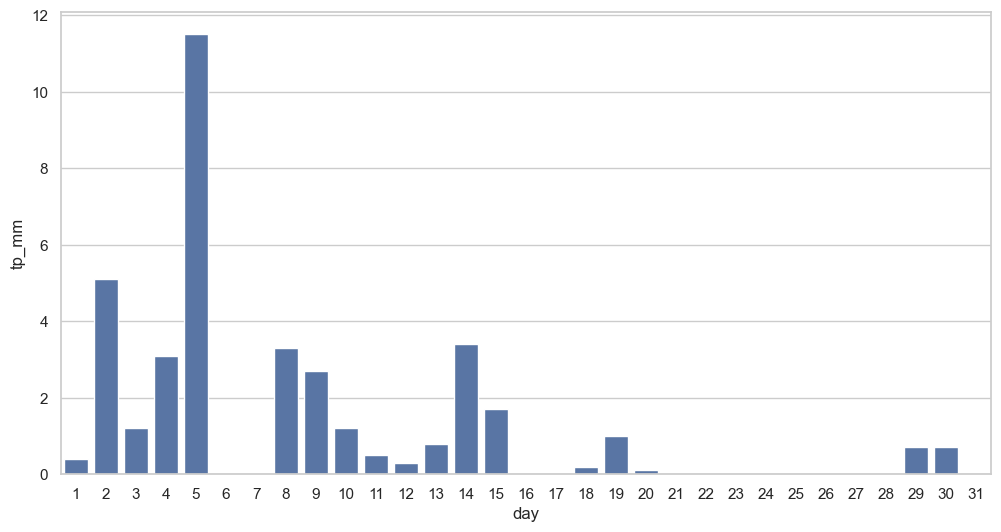

In [51]:
fig_size = (12,6)

sns.set_theme(style="whitegrid")
plt.figure(figsize=fig_size)

sns.barplot(
    data = data_plot,
    x = 'day',
    y = 'tp_mm'
);

In [52]:
data_plot['tp_mm'].sum()

37.900000000000006

<Axes: xlabel='month_int', ylabel='monthly_tp_mm'>

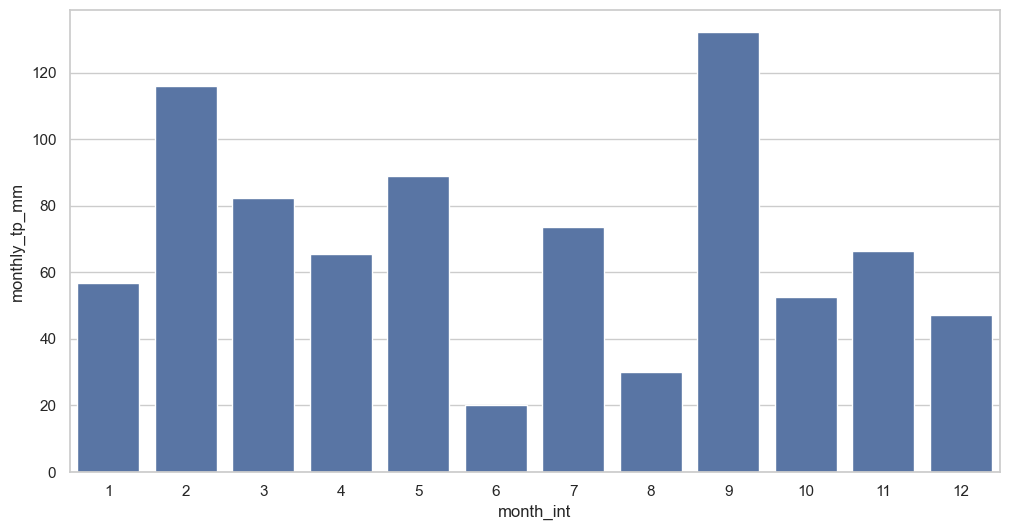

In [28]:
fig_size = (12,6)

sns.set_theme(style="whitegrid")
plt.figure(figsize=fig_size)

sns.barplot(
    data = london_monthly_2024,
    x = 'month_int',
    y = 'monthly_tp_mm'
)

<Axes: xlabel='month_int', ylabel='monthly_tp_mm'>

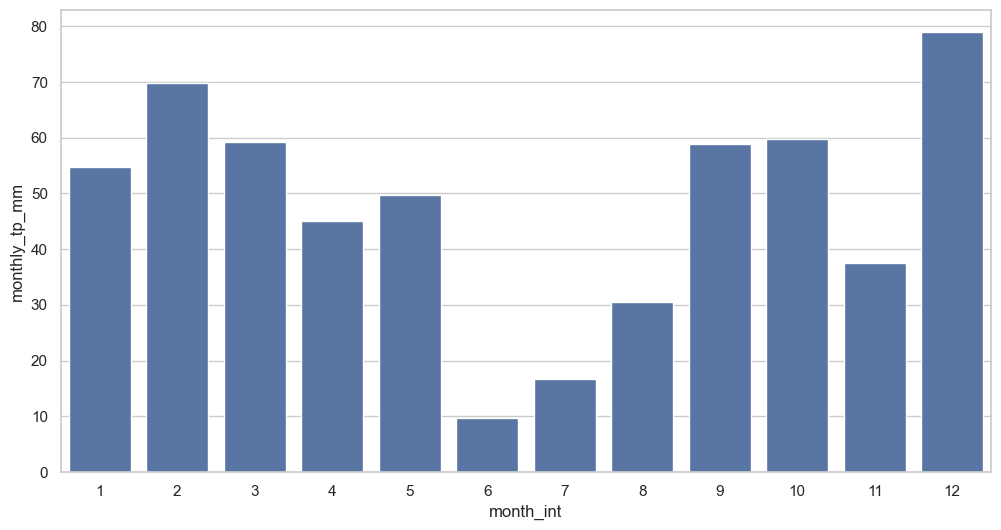

In [29]:
fig_size = (12,6)

sns.set_theme(style="whitegrid")
plt.figure(figsize=fig_size)

sns.barplot(
    data = puglia_monthly_2024,
    x = 'month_int',
    y = 'monthly_tp_mm'
)

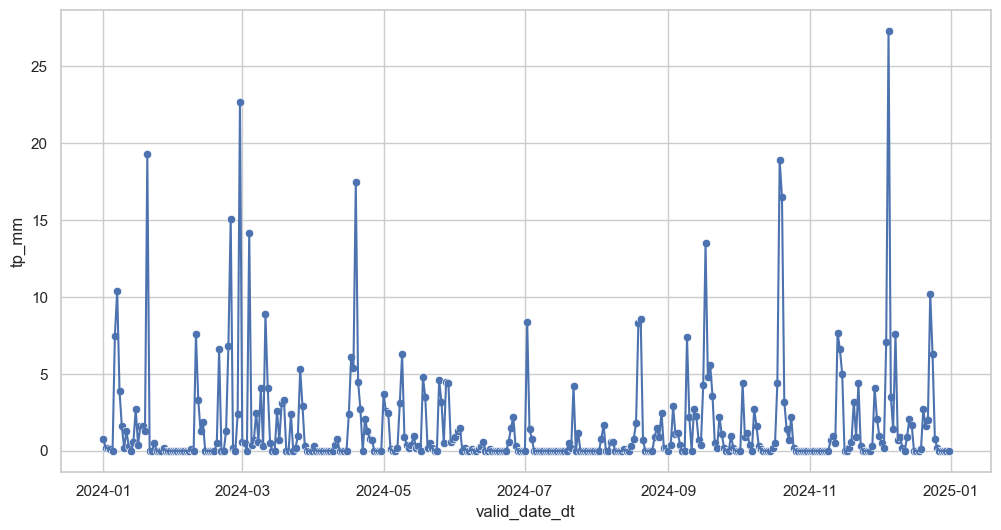

In [19]:
fig_size = (12,6)

sns.set_theme(style="whitegrid")
plt.figure(figsize=fig_size)

ax = sns.scatterplot(
    data=df_puglia_2024,
    x='valid_date_dt',
    y='tp_mm'
    );

ax = sns.lineplot(
    data=df_puglia_2024,
    x='valid_date_dt',
    y='tp_mm'
    );

In [23]:
df_london_2024

,valid_date_dt,tp_mm
0,2024-01-01,12.4
1,2024-01-02,11.0
2,2024-01-03,0.3
3,2024-01-04,14.6
4,2024-01-05,4.1
...,...,...
361,2024-12-27,0.3
362,2024-12-28,0.2
363,2024-12-29,0.0
364,2024-12-30,0.0


In [62]:
data_puglia_2020_lf = pd.read_csv('./data/2020_puglia_era5_precipitation_long_format.csv',comment = '#')
data_puglia_2020_lf.shape

(2687904, 8)

In [65]:
data_puglia_2020_lf['latitude'].nunique()

18

In [67]:
data_puglia_2020_lf['longitude'].nunique()

32

In [68]:
18*32

576

In [70]:
(18*32)*24*365

5045760

In [140]:
data_puglia_2020_lf['latitude'].unique()[10]

40.899999999999984

In [169]:
lats = data_puglia_2020_lf['latitude'].unique()
lons = data_puglia_2020_lf['longitude'].unique()
latit = []
longit = []
tp_sum = []

for lat in lats:
    for lon in lons:
        df = data_puglia_2020_lf[(data_puglia_2020_lf['latitude'] == lat) &
                                 (data_puglia_2020_lf['longitude'] == lon)]
        if df.shape[0] != 0:
            # print(f"lat = {lat}, lon = {lon}, df_shape = {df.shape}")
            latit.append(lat)
            longit.append(lon)
            df_data = df[(df['latitude'] == lat) & (df['longitude'] == lon)].copy()
            test = create_tp_daily_summary(df_data, year=2020)
            tp_sum.append(test['tp_mm'].sum())
            
# for lat in lats:
#     print(f"lat = {lat}, ")

In [174]:
df_map = pd.DataFrame(
        {
        'latitude' : latit,
        'longitude' : longit,
        'tp_mm_year_2022' : tp_sum
        }
        )

In [175]:
df_map

,latitude,longitude,tp_mm_year_2022
0,41.9,15.4,525.3
1,41.9,15.5,541.9
2,41.9,15.8,591.9
3,41.9,15.9,551.9
4,41.9,16.0,524.2
...,...,...,...
301,40.2,18.0,596.8
302,40.2,18.1,617.2
303,40.2,18.2,634.1
304,40.2,18.3,636.4


In [ ]:
import plotly.express as px

fig_size = (12,12)

sns.set_theme(style="whitegrid")
plt.figure(figsize=fig_size)

fig = px.scatter_mapbox(
    df_map, 
    lat="latitude", 
    lon="longitude", 
    color="tp_mm_year_2022",
    size_max=15,
    zoom=5,
    mapbox_style="open-street-map",
    title="Precipitation Map",
    color_continuous_scale="Viridis"
)

fig.show();

<Figure size 1200x1200 with 0 Axes>

<Axes: >

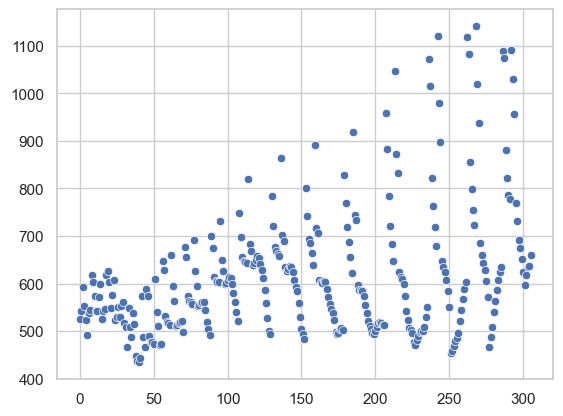

In [167]:
sns.scatterplot(
    x = np.arange(0, len(tp_sum)),
    y = tp_sum
)

In [159]:
len(lat_lon)

306

41.9
41.8
41.7
41.6
41.49999999999999
41.39999999999999
41.29999999999999
41.19999999999999
41.09999999999999
40.99999999999999
40.899999999999984
40.79999999999998
40.69999999999998
40.59999999999998
40.49999999999998
40.39999999999998
40.299999999999976
40.2


In [130]:
data_puglia_2020_lf[(data_puglia_2020_lf['step'].str[0] == '1') & 
                    (data_puglia_2020_lf['time'] == '2020-01-03') &
                    (data_puglia_2020_lf['latitude'] == 40.5)]

,time,step,latitude,longitude,number,surface,valid_time,tp


In [142]:
data_puglia_2020_lf[ (data_puglia_2020_lf['step'].str[0] == '1') & 
                    (data_puglia_2020_lf['time'] == '2020-01-03') &
                    (data_puglia_2020_lf['latitude'] == 40.899999999999984)]

,time,step,latitude,longitude,number,surface,valid_time,tp
22140,2020-01-03,1 days 00:00:00,40.9,15.3,0,0.0,2020-01-04 00:00:00,0.000002
22141,2020-01-03,1 days 00:00:00,40.9,15.4,0,0.0,2020-01-04 00:00:00,0.000002
22142,2020-01-03,1 days 00:00:00,40.9,15.5,0,0.0,2020-01-04 00:00:00,0.000002
22143,2020-01-03,1 days 00:00:00,40.9,15.6,0,0.0,2020-01-04 00:00:00,0.000002
22144,2020-01-03,1 days 00:00:00,40.9,15.7,0,0.0,2020-01-04 00:00:00,0.000002
22145,2020-01-03,1 days 00:00:00,40.9,15.8,0,0.0,2020-01-04 00:00:00,0.000002
22146,2020-01-03,1 days 00:00:00,40.9,15.9,0,0.0,2020-01-04 00:00:00,0.000002
22147,2020-01-03,1 days 00:00:00,40.9,16.0,0,0.0,2020-01-04 00:00:00,0.000002
22148,2020-01-03,1 days 00:00:00,40.9,16.1,0,0.0,2020-01-04 00:00:00,0.000002
22149,2020-01-03,1 days 00:00:00,40.9,16.2,0,0.0,2020-01-04 00:00:00,0.000002


In [145]:
data_puglia_2020_409_162 = data_puglia_2020_lf[(data_puglia_2020_lf['latitude'] == 40.899999999999984) &
                                               (data_puglia_2020_lf['longitude'] == 16.2)]

In [147]:
data_puglia_2020_409_162

,time,step,latitude,longitude,number,surface,valid_time,tp
117,2019-12-31,1 days 00:00:00,40.9,16.2,0,0.0,2020-01-01 00:00:00,8.523463e-07
423,2020-01-01,0 days 01:00:00,40.9,16.2,0,0.0,2020-01-01 01:00:00,0.000000e+00
729,2020-01-01,0 days 02:00:00,40.9,16.2,0,0.0,2020-01-01 02:00:00,0.000000e+00
1035,2020-01-01,0 days 03:00:00,40.9,16.2,0,0.0,2020-01-01 03:00:00,0.000000e+00
1341,2020-01-01,0 days 04:00:00,40.9,16.2,0,0.0,2020-01-01 04:00:00,0.000000e+00
...,...,...,...,...,...,...,...,...
2686491,2020-12-31,0 days 19:00:00,40.9,16.2,0,0.0,2020-12-31 19:00:00,1.771514e-04
2686797,2020-12-31,0 days 20:00:00,40.9,16.2,0,0.0,2020-12-31 20:00:00,1.771514e-04
2687103,2020-12-31,0 days 21:00:00,40.9,16.2,0,0.0,2020-12-31 21:00:00,1.771514e-04
2687409,2020-12-31,0 days 22:00:00,40.9,16.2,0,0.0,2020-12-31 22:00:00,1.771514e-04


In [148]:
test_2020 = create_tp_daily_summary(data_puglia_2020_409_162, year=2020)
test_2020['tp_mm'].sum()

640.0

In [105]:
data_puglia_2020_418_160

,time,step,latitude,longitude,number,surface,valid_time,tp


In [91]:
test_2020 = create_tp_daily_summary(data_puglia_2020_418_153, year=2020)

In [93]:
test_2020['tp_mm'].sum()

542.4000000000001

In [88]:
8784/24

366.0

In [77]:
data_puglia_2020_lf.shape

(2687904, 8)

In [81]:
data_puglia_2020_lf['longitude'].nunique()

32

In [83]:
data_puglia_2020_lf['latitude'].nunique()

18

In [59]:
data_puglia_2020['step'].unique()

array(['0 days 01:00:00', '0 days 02:00:00', '0 days 03:00:00',
       '0 days 04:00:00', '0 days 05:00:00', '0 days 06:00:00',
       '0 days 07:00:00', '0 days 08:00:00', '0 days 09:00:00',
       '0 days 10:00:00', '0 days 11:00:00', '0 days 12:00:00',
       '0 days 13:00:00', '0 days 14:00:00', '0 days 15:00:00',
       '0 days 16:00:00', '0 days 17:00:00', '0 days 18:00:00',
       '0 days 19:00:00', '0 days 20:00:00', '0 days 21:00:00',
       '0 days 22:00:00', '0 days 23:00:00', '1 days 00:00:00'],
      dtype=object)

In [61]:
data_puglia_2020[data_puglia_2020['step'].str[0] =='1']['tp'].sum()

0.5201062476

-------------------

In [53]:
from datetime import timedelta

def create_tp_daily_summary(df_data, year = 2025, threshold = 0.1):
    # creating `tp_mm`
    df = df_data.copy()
    df['tp_mm'] = 1000*df['tp']

    # Creating valid date column
    df['valid_time_dt'] = pd.to_datetime(df['valid_time'])
    df['valid_date'] = df['valid_time_dt'].dt.date
    mask_hour_0 = df['valid_time_dt'].dt.hour == 0
    df.loc[mask_hour_0, 'valid_date'] = df.loc[mask_hour_0, 'valid_date'] - timedelta(days=1)

    # thresholding and rounding tp_mm
    df.loc[df['tp_mm'] < threshold, 'tp_mm'] = 0.0
    df['tp_mm'] = np.round(df['tp_mm'], 1)

    # computing daily aggregate
    df['valid_date_dt'] = pd.to_datetime(df['valid_date'])
    df['year'] = df['valid_date_dt'].dt.year

    df_daily_tp_mm = (df[df['year'] == year]
                  .groupby('valid_date_dt')['tp_mm']
                  .max()
                  ).reset_index()
    return(df_daily_tp_mm)


In [108]:
def create_tp_monthly_aggregate(df_data):
    df_data['month_int'] = df_data['valid_date_dt'].dt.month
    df_data['month_str'] = df_data['valid_date_dt'].dt.strftime('%b')

    tp_monthly_aggregate = (df_data
                            .groupby('month_int')
                            .agg(
                                month_str = ('month_str', 'first'),
                                monthly_tp_mm = ('tp_mm', 'sum')
                                )
                                ).reset_index()
    
    return(tp_monthly_aggregate)

In [112]:
df_london_2024 = create_tp_daily_summary(df_data,
                                  year=2024)

In [113]:
london_monthly_2024 = create_tp_monthly_aggregate(df_london_2024)
london_monthly_2024.head()

,month_int,month_str,monthly_tp_mm
0,1,Jan,56.8
1,2,Feb,116.2
2,3,Mar,82.3
3,4,Apr,65.5
4,5,May,89.1


In [114]:
london_monthly_2024['monthly_tp_mm'].sum()

832.5999999999999

In [110]:
puglia_monthly_2024 =create_tp_monthly_aggregate(df_test)
puglia_monthly_2024.head()

,month_int,month_str,monthly_tp_mm
0,1,Jan,54.7
1,2,Feb,69.8
2,3,Mar,59.2
3,4,Apr,45.0
4,5,May,49.7


In [99]:
df_test['month_int'] = df_test['valid_date_dt'].dt.month
df_test['month_str'] = df_test['valid_date_dt'].dt.strftime('%b')

In [107]:
(df_test
 .groupby('month_int')
 .agg(
     month_str = ('month_str', 'first'),
     monthly_tp_mm = ('tp_mm', 'sum')
 )
).reset_index()


,month_int,month_str,monthly_tp_mm
0,1,Jan,54.7
1,2,Feb,69.8
2,3,Mar,59.2
3,4,Apr,45.0
4,5,May,49.7
5,6,Jun,9.7
6,7,Jul,16.7
7,8,Aug,30.5
8,9,Sep,58.9
9,10,Oct,59.8


In [106]:
df_test

,valid_date_dt,tp_mm,month_int,month_str
0,2024-01-01,0.8,1,Jan
1,2024-01-02,0.2,1,Jan
2,2024-01-03,0.2,1,Jan
3,2024-01-04,0.1,1,Jan
4,2024-01-05,0.0,1,Jan
...,...,...,...,...
361,2024-12-27,0.0,12,Dec
362,2024-12-28,0.0,12,Dec
363,2024-12-29,0.0,12,Dec
364,2024-12-30,0.0,12,Dec


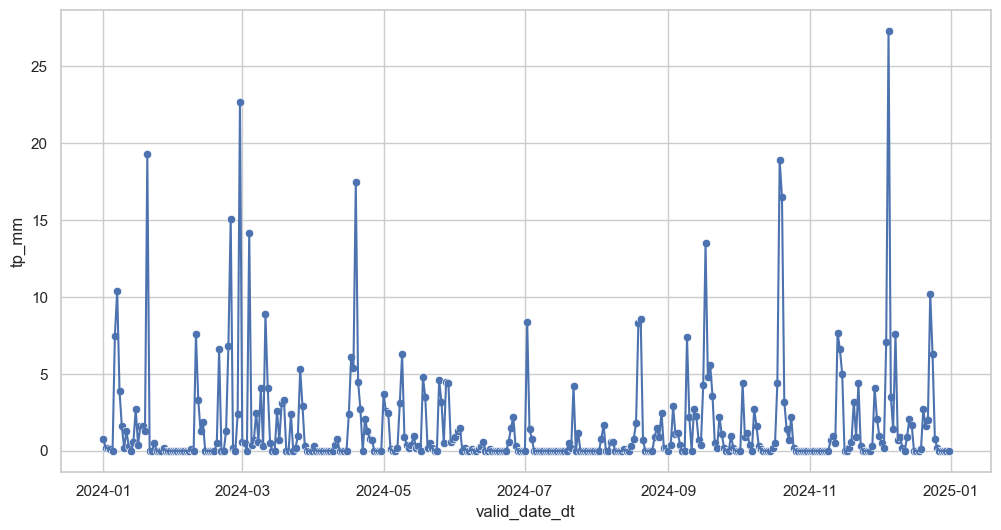

In [96]:
fig_size = (12,6)


sns.set_theme(style="whitegrid")
plt.figure(figsize=fig_size)

ax = sns.scatterplot(
    data=df_test,
    x='valid_date_dt',
    y='tp_mm'
    );

ax = sns.lineplot(
    data=df_test,
    x='valid_date_dt',
    y='tp_mm'
    );

In [3]:
# creating `tp_mm`

df_data['tp_mm'] = 1000*df_data['tp']

In [4]:
df_data.head(3)

,step,number,surface,valid_time,tp,tp_mm
0,1 days 00:00:00,0,0.0,2025-01-01 00:00:00,1.214221e-04,0.121422
1,0 days 01:00:00,0,0.0,2025-01-01 01:00:00,9.459133e-07,0.000946
2,0 days 02:00:00,0,0.0,2025-01-01 02:00:00,1.864197e-06,0.001864


The raws with 1 days contains the cumulative sum of rainfall. To consider the total rainfall for each day, we should take the 00 hour of each day and scale back by one day. So, to assign the 2025-01-01 tp, we need to extract the "00:00:00" hour of the next day `valid_date`

In [5]:
# Creating valid date

from datetime import timedelta

# # Method 2 - Corrected for date objects
# df_london_2025_reduced['valid_date'] = df_london_2025_reduced['date']  # Start with original date
# mask_hour_0 = df_london_2025_reduced['hour'] == 0
# df_london_2025_reduced.loc[mask_hour_0, 'valid_date'] = df_london_2025_reduced.loc[mask_hour_0, 'date'] - timedelta(days=1)

df_data['valid_time_dt'] = pd.to_datetime(df_data['valid_time'])
df_data['valid_date'] = df_data['valid_time_dt'].dt.date
mask_hour_0 = df_data['valid_time_dt'].dt.hour == 0
df_data.loc[mask_hour_0, 'valid_date'] = df_data.loc[mask_hour_0, 'valid_date'] - timedelta(days=1)

At this step, we can save the daily data as `pkl` file if needed for different analysis around the time of the day.

In [6]:
starting_date = df_data[df_data['valid_time'] == df_data['valid_time'].min()]['valid_time_dt'].dt.strftime('%Y-%m-%d').values[0].replace('-','_')
ending_date = df_data[df_data['valid_time_dt'] == df_data['valid_time_dt'].max()]['valid_time_dt'].dt.strftime('%Y-%m-%d').values[0].replace('-','_')

starting_date + '_' + ending_date

# ['valid_time_dt'].dt.strftime('%Y-%m-%d')


'2025_01_01_2025_06_27'

- rounding `tp_mm`

We set all values below 0.09 to 0 and then round `tp_mm` to the first decimal digit 

In [7]:
# threshold set
threshold = 0.1
df_data.loc[df_data['tp_mm'] < threshold, 'tp_mm'] = 0.0
df_data['tp_mm'] = np.round(df_data['tp_mm'], 1)


In [8]:
df_data.head()

,step,number,surface,valid_time,tp,tp_mm,valid_time_dt,valid_date
0,1 days 00:00:00,0,0.0,2025-01-01 00:00:00,1.214221e-04,0.1,2025-01-01 00:00:00,2024-12-31
1,0 days 01:00:00,0,0.0,2025-01-01 01:00:00,9.459133e-07,0.0,2025-01-01 01:00:00,2025-01-01
2,0 days 02:00:00,0,0.0,2025-01-01 02:00:00,1.864197e-06,0.0,2025-01-01 02:00:00,2025-01-01
3,0 days 03:00:00,0,0.0,2025-01-01 03:00:00,1.998929e-06,0.0,2025-01-01 03:00:00,2025-01-01
4,0 days 04:00:00,0,0.0,2025-01-01 04:00:00,2.486942e-06,0.0,2025-01-01 04:00:00,2025-01-01


## Daily Aggregate

The following code refers to annual data. We will expand while dealing with multi years dataset.

In [9]:
df_data['valid_date_dt'] = pd.to_datetime(df_data['valid_date'])

In [11]:
df_data['year'] = df_data['valid_date_dt'].dt.year
# df_data['month_int'] = df_data['valid_date_dt'].dt.month
# df_data['month'] = df_data['valid_date_dt'].dt.strftime('%b')

In [17]:
df_daily_tp_mm = (df_data[df_data['year'] == 2025]
                  .groupby('valid_date_dt')['tp_mm']
                  .max()
                  ).reset_index()

In [18]:
df_daily_tp_mm.head()

,valid_date_dt,tp_mm
0,2025-01-01,9.2
1,2025-01-02,0.0
2,2025-01-03,0.0
3,2025-01-04,4.9
4,2025-01-05,20.3


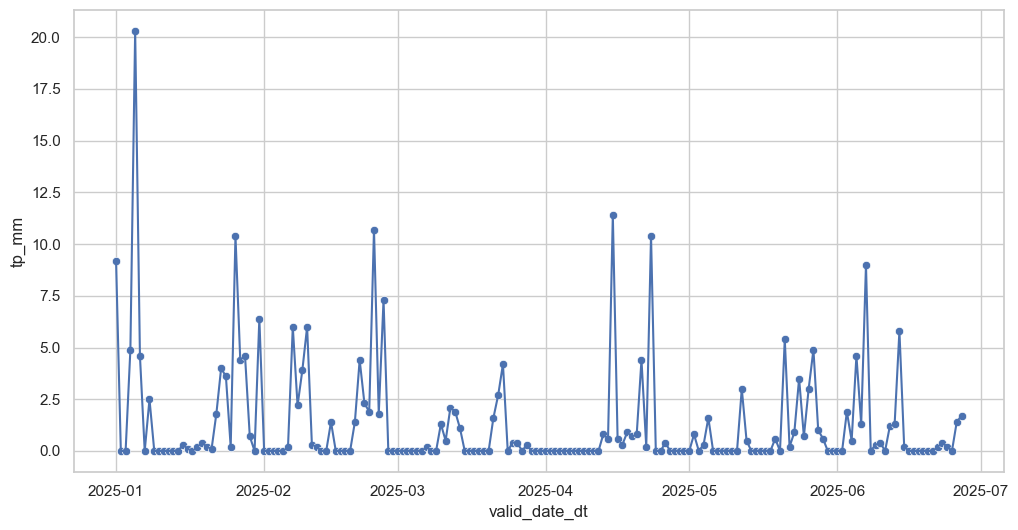

In [20]:
fig_size = (12,6)


sns.set_theme(style="whitegrid")
plt.figure(figsize=fig_size)

ax = sns.scatterplot(
    data=df_daily_tp_mm,
    x='valid_date_dt',
    y='tp_mm'
    );

ax = sns.lineplot(
    data=df_daily_tp_mm,
    x='valid_date_dt',
    y='tp_mm'
    );

In [48]:
df_london_2025['valid_time_dt'] = pd.to_datetime(df_london_2025['valid_time'])

# Create all derived columns
df_london_2025['date'] = df_london_2025['valid_time_dt'].dt.date  # Date without time
df_london_2025['date_str'] = df_london_2025['valid_time_dt'].dt.strftime('%Y-%m-%d')  # String format

df_london_2025['year'] = df_london_2025['valid_time_dt'].dt.year
df_london_2025['month'] = df_london_2025['valid_time_dt'].dt.strftime('%b')  # Jan, Feb, etc.
df_london_2025['day'] = df_london_2025['valid_time_dt'].dt.day  # Day as integer
df_london_2025['hour'] = df_london_2025['valid_time_dt'].dt.hour
df_london_2025['month_int'] = df_london_2025['valid_time_dt'].dt.month  # Month as integer

In [51]:
df_london_2025['date'][0]

datetime.date(2025, 1, 1)

In [42]:
feats = ['valid_time_dt', 'date', 'year', 'month', 'day', 'hour', 'tp_mm']
df_london_2025_reduced = df_london_2025[feats].copy()

In [56]:
from datetime import timedelta

# Method 2 - Corrected for date objects
df_london_2025_reduced['valid_date'] = df_london_2025_reduced['date']  # Start with original date
mask_hour_0 = df_london_2025_reduced['hour'] == 0
df_london_2025_reduced.loc[mask_hour_0, 'valid_date'] = df_london_2025_reduced.loc[mask_hour_0, 'date'] - timedelta(days=1)


In [57]:
df_london_2025_reduced.head(27)

,valid_time_dt,date,year,month,day,hour,tp_mm,valid_date
0,2025-01-01 00:00:00,2025-01-01,2025,Jan,1,0,0.121422,2024-12-31
1,2025-01-01 01:00:00,2025-01-01,2025,Jan,1,1,0.000946,2025-01-01
2,2025-01-01 02:00:00,2025-01-01,2025,Jan,1,2,0.001864,2025-01-01
3,2025-01-01 03:00:00,2025-01-01,2025,Jan,1,3,0.001999,2025-01-01
4,2025-01-01 04:00:00,2025-01-01,2025,Jan,1,4,0.002487,2025-01-01
5,2025-01-01 05:00:00,2025-01-01,2025,Jan,1,5,0.002949,2025-01-01
6,2025-01-01 06:00:00,2025-01-01,2025,Jan,1,6,0.004123,2025-01-01
7,2025-01-01 07:00:00,2025-01-01,2025,Jan,1,7,0.007323,2025-01-01
8,2025-01-01 08:00:00,2025-01-01,2025,Jan,1,8,0.013674,2025-01-01
9,2025-01-01 09:00:00,2025-01-01,2025,Jan,1,9,0.040860,2025-01-01


In [78]:
df_london_2025_daily = (df_london_2025_reduced
                        .groupby('valid_date')['tp_mm']
                        .max()
                        ).reset_index()

In [79]:
df_london_2025_daily

,valid_date,tp_mm
0,2024-12-31,0.121422
1,2025-01-01,9.174707
2,2025-01-02,0.002662
3,2025-01-03,0.000860
4,2025-01-04,4.871828
...,...,...
174,2025-06-23,0.391878
175,2025-06-24,0.184347
176,2025-06-25,0.043636
177,2025-06-26,1.363419


In [63]:
df_london_2025_reduced[df_london_2025_reduced['hour'] == 0]['tp_mm']

0       0.121422
24      9.174707
48      0.002660
72      0.000852
96      4.871828
          ...   
4152    0.164652
4176    0.391878
4200    0.184346
4224    0.043636
4248    1.363419
Name: tp_mm, Length: 178, dtype: float64

In [76]:
type(df_london_2025_daily['valid_date'][0])

datetime.date

In [17]:
df_london_2025['valid_datetime'].dt.date

0       2025-01-01
1       2025-01-01
2       2025-01-01
3       2025-01-01
4       2025-01-01
           ...    
4260    2025-06-27
4261    2025-06-27
4262    2025-06-27
4263    2025-06-27
4264    2025-06-27
Name: valid_datetime, Length: 4265, dtype: object

In [80]:
# Convert to datetime temporarily
temp_dt = pd.to_datetime(df_london_2025_daily['valid_date'])

# Extract components
df_london_2025_daily['year'] = temp_dt.dt.year
df_london_2025_daily['month_int'] = temp_dt.dt.month
df_london_2025_daily['day'] = temp_dt.dt.day
df_london_2025_daily['month_str'] = temp_dt.dt.strftime('%b').str.lower()

In [81]:
df_london_2025_daily

,valid_date,tp_mm,year,month_int,day,month_str
0,2024-12-31,0.121422,2024,12,31,dec
1,2025-01-01,9.174707,2025,1,1,jan
2,2025-01-02,0.002662,2025,1,2,jan
3,2025-01-03,0.000860,2025,1,3,jan
4,2025-01-04,4.871828,2025,1,4,jan
...,...,...,...,...,...,...
174,2025-06-23,0.391878,2025,6,23,jun
175,2025-06-24,0.184347,2025,6,24,jun
176,2025-06-25,0.043636,2025,6,25,jun
177,2025-06-26,1.363419,2025,6,26,jun


In [87]:
(df_london_2025_daily[df_london_2025_daily['year'] == 2025]
 .groupby('month_int')['tp_mm']
 .sum()
 ).reset_index()

,month_int,tp_mm
0,1,79.178369
1,2,50.425044
2,3,17.099948
3,4,31.663935
4,5,27.608642
5,6,30.419911


In [85]:
df_london_2025_daily[df_london_2025_daily['month_int'] == 1]

,valid_date,tp_mm,year,month_int,day,month_str
1,2025-01-01,9.174707,2025,1,1,jan
2,2025-01-02,0.002662,2025,1,2,jan
3,2025-01-03,0.000860,2025,1,3,jan
4,2025-01-04,4.871828,2025,1,4,jan
5,2025-01-05,20.303559,2025,1,5,jan
6,2025-01-06,4.635741,2025,1,6,jan
7,2025-01-07,0.009011,2025,1,7,jan
8,2025-01-08,2.509024,2025,1,8,jan
9,2025-01-09,0.087420,2025,1,9,jan
10,2025-01-10,0.002157,2025,1,10,jan
